# **SPEECH EMOTION RECOGNITION**




# EXPLORATORY DATA ANALYSIS


In [1]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# path to the directory
dataset_path = "/content/drive/MyDrive/PDS/Final_project/speech-emotion-recognition-ravdess-data/"

Data cleaning

Verify File Integrity

Check if all .wav files are accessible and not corrupted.

In [5]:
import os
from scipy.io import wavfile

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    for file in os.listdir(folder_path):
        if file.endswith('.wav'):
            try:
                wavfile.read(os.path.join(folder_path, file))  # Test reading file
            except:
                print(f"Corrupted file: {file}")

In [6]:
import os
import pandas as pd

# Initialize lists for attributes
emotions = []
paths = []
gender = []

# Process the files
dir_list = os.listdir(dataset_path)

for folder in dir_list:
    # Check if it's a directory before proceeding
    if os.path.isdir(os.path.join(dataset_path, folder)) and file.endswith('.wav'):
        files = os.listdir(os.path.join(dataset_path, folder))
        for file in files:
            # Extract file identifiers
            parts = file.split('.')[0].split('-')
            emotions.append(int(parts[2]))
            paths.append(os.path.join(dataset_path, folder, file))

            # Extract gender (odd = male, even = female)
            actor_id = int(parts[6])

            gender.append("female" if actor_id % 2 == 0 else "male")


# Create DataFrame
df = pd.DataFrame({'emotion': emotions, 'path': paths})

# Map emotion codes to labels
emotion_mapping = {
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
}
df['emotion'] = df['emotion'].map(emotion_mapping)

# Count each emotion
emotion_counts = df['emotion'].value_counts()

# Display emotion counts
print("Emotion Counts:\n", emotion_counts)

Emotion Counts:
 emotion
angry       192
happy       192
fear        192
sad         192
calm        192
surprise    192
disgust     192
neutral      96
Name: count, dtype: int64


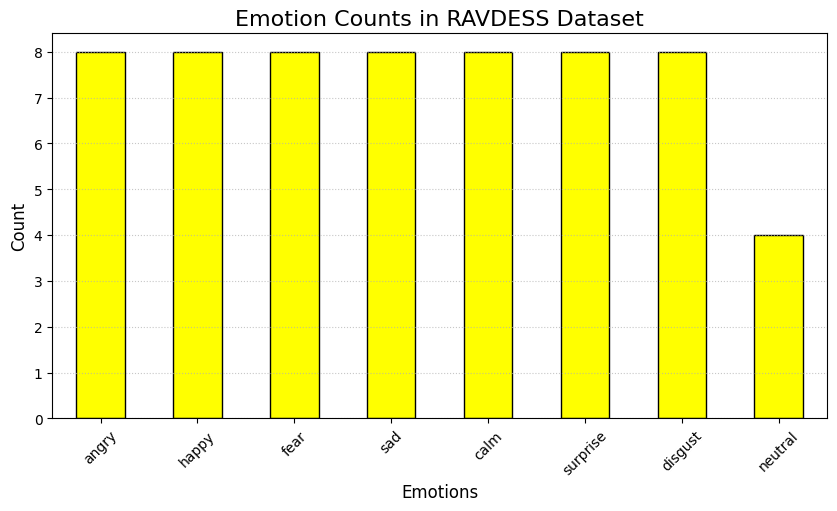

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
emotion_counts.plot(kind='bar', color='yellow', edgecolor='black')

plt.title('Emotion Counts in RAVDESS Dataset', fontsize=16)
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.7)


plt.show()


EDA


female male - emotions comparision


voice frequency comparision


most, least seen emotion


with noise without noise

Gender vs emotions vs count

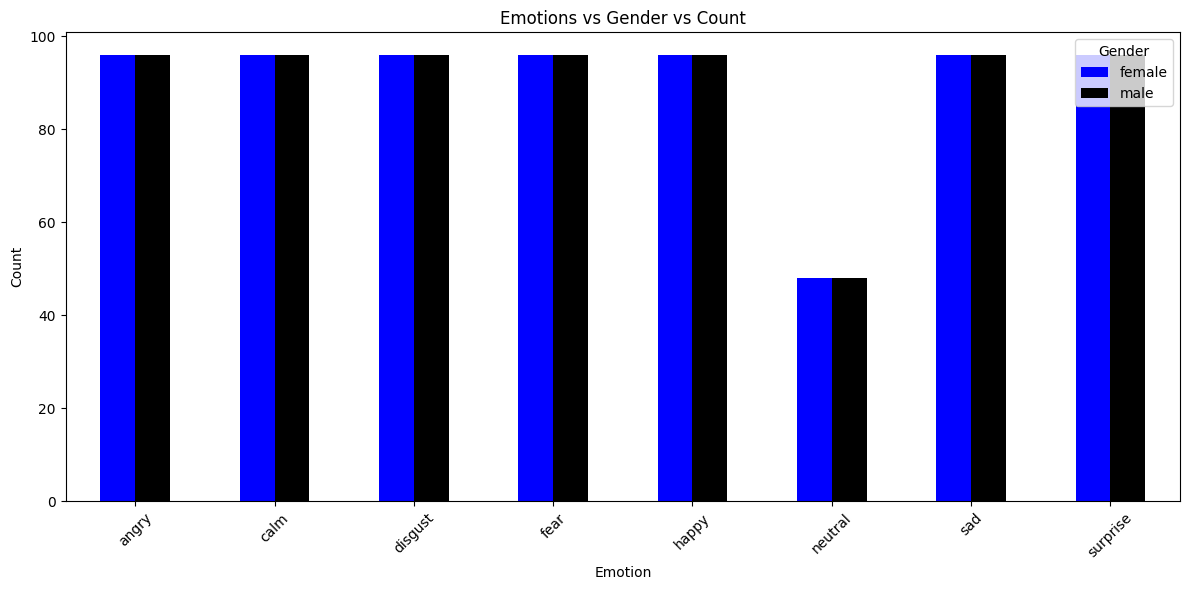

In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
df_gender = pd.DataFrame({'emotion': emotions, 'gender': gender})
emotion_mapping = {
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
}
df_gender['emotion'] = df_gender['emotion'].map(emotion_mapping)

# Group by emotion and gender, and count occurrences
emotion_gender_counts = df_gender.groupby(['emotion', 'gender']).size().unstack().fillna(0)
emotion_gender_counts = emotion_gender_counts.astype(int)


# Plot the bar chart
emotion_gender_counts.plot(kind='bar', figsize=(12, 6), color=['blue', 'black'])
plt.title('Emotions vs Gender vs Count')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

Least seen emotion for Actor-1

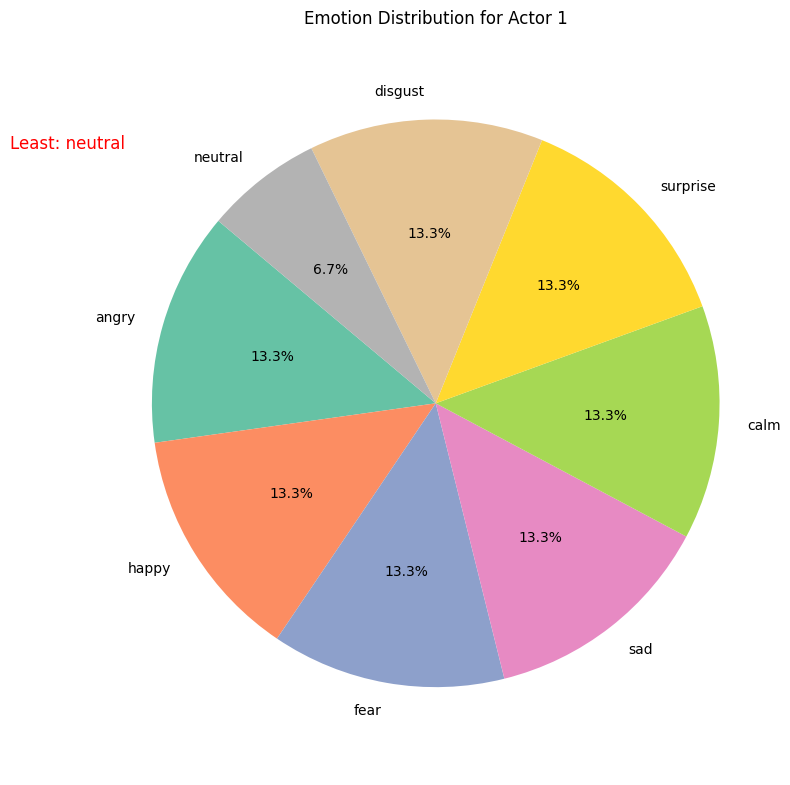

Least seen emotion for Actor 1: neutral


In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Initialize lists
emotions = []
actors = []

# Extract emotions and actor IDs
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            parts = file.split('.')[0].split('-')
            emotion = int(parts[2])
            actor = int(parts[6])

            emotions.append(emotion)
            actors.append(actor)

# Map emotions to descriptive labels
emotion_mapping = {
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
}
emotions = [emotion_mapping[e] for e in emotions]

# Create a DataFrame
df_actor = pd.DataFrame({'actor': actors, 'emotion': emotions})

actor_id = 1

# Filter the DataFrame for the specific actor
actor_emotions = df_actor[df_actor['actor'] == actor_id]

# Count the occurrences of each emotion for that actor
emotion_counts = actor_emotions['emotion'].value_counts()

most_seen_emotion = emotion_counts.idxmax()
least_seen_emotion = emotion_counts.idxmin()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts.values, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', n_colors=len(emotion_counts)))
plt.title(f'Emotion Distribution for Actor {actor_id}')
plt.axis('equal')


plt.text(-1.5, 0.9, f'Least: {least_seen_emotion}', color='red', fontsize=12)

plt.tight_layout()
plt.show()


print(f"Least seen emotion for Actor {actor_id}: {least_seen_emotion}")


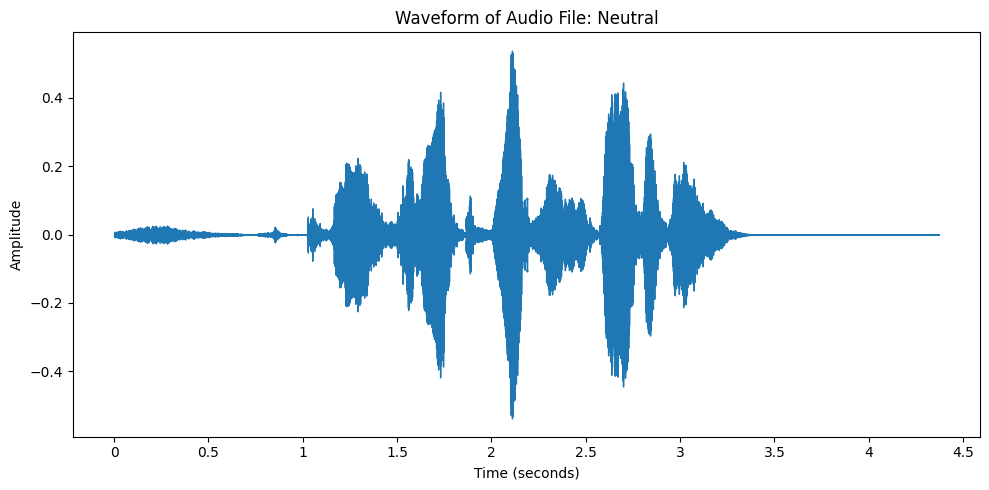

In [11]:
import os
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

# path to the directory
dataset_path = "/content/drive/MyDrive/PDS/Final_project/speech-emotion-recognition-ravdess-data/"
# Initialize lists for attributes
emotions = []
actors = []
paths = []


# Process the files
dir_list = os.listdir(dataset_path)
dir_list.sort()

for folder in dir_list:
    if os.path.isdir(os.path.join(dataset_path, folder)):
        files = os.listdir(os.path.join(dataset_path, folder))
        for file in files:
            # Extract file identifiers
            parts = file.split('.')[0].split('-')
            emotion = int(parts[2])
            actor = int(parts[6])  # Extract actor ID
            emotions.append(emotion)
            actors.append(actor)
            paths.append(os.path.join(dataset_path, folder, file))

# Create DataFrame
df = pd.DataFrame({'emotion': emotions, 'actor': actors, 'path': paths})

# Map emotion codes to labels
emotion_mapping = {
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
}
df['emotion'] = df['emotion'].map(emotion_mapping)

# Filter data for actor 1
actor_1_files = df[df['actor'] == 1]

# Load and plot the waveform for the first audio file of actor 1
audio_file_path = actor_1_files.iloc[0]['path']
y, sr = librosa.load(audio_file_path, sr=None)  # Load the audio file

# Plot the waveform
plt.figure(figsize=(10, 5))
librosa.display.waveshow(y, sr=sr)
plt.title(f'Waveform of Audio File: Neutral')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()



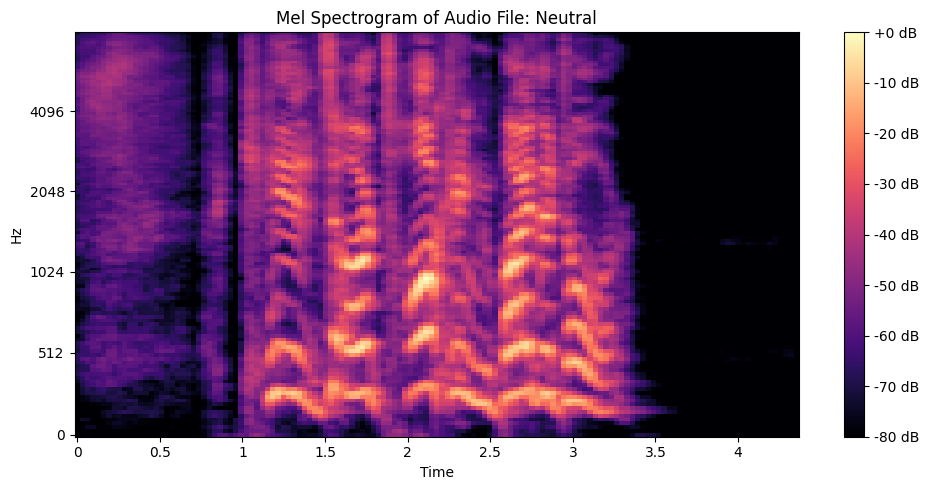

In [12]:
import os
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load and plot the spectrogram
plt.figure(figsize=(10, 5))

# Calculate the spectrogram (using Mel-spectrogram for better visualization)
S = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert the spectrogram to decibel scale
S_db = librosa.power_to_db(S, ref=np.max(S))

# Plot the spectrogram
librosa.display.specshow(S_db, sr=sr, y_axis='mel', x_axis='time')
plt.title(f'Mel Spectrogram of Audio File: Neutral')
plt.colorbar(format="%+2.0f dB")  # Add colorbar for decibel scale
plt.tight_layout()
plt.show()

Data Augmentation

In [13]:
def noise(data, noise_factor=0.005):
    noise_amp = noise_factor * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def pitch(data, sample_rate, n_steps=2):
    return librosa.effects.pitch_shift(data, sr=sample_rate, n_steps=n_steps)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def volume(data, gain_factor=500):
    return data * gain_factor

Visualisations for noise, stretch, pitch, shift and volume

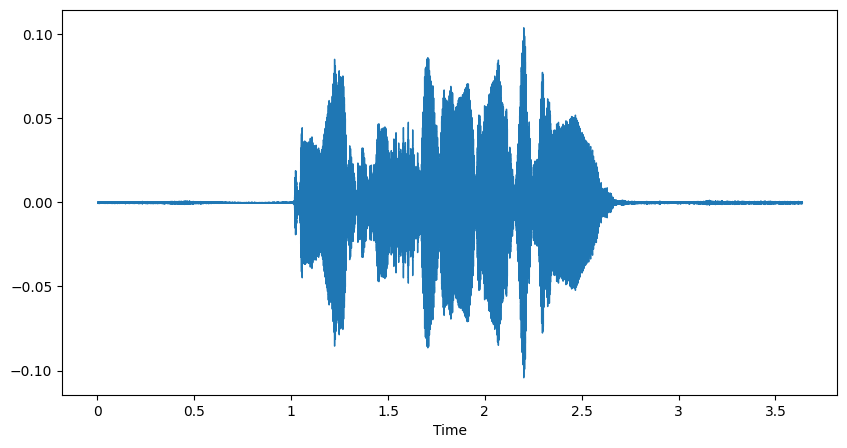

In [14]:
original_audio = dataset_path +'Actor_10/03-01-02-01-02-01-10.wav'
data, sr = librosa.load(original_audio)

# Play the audio
ipd.display(ipd.Audio(original_audio))

#plot waveform
plt.figure(figsize=(10,5))
librosa.display.waveshow(data, sr=sr)


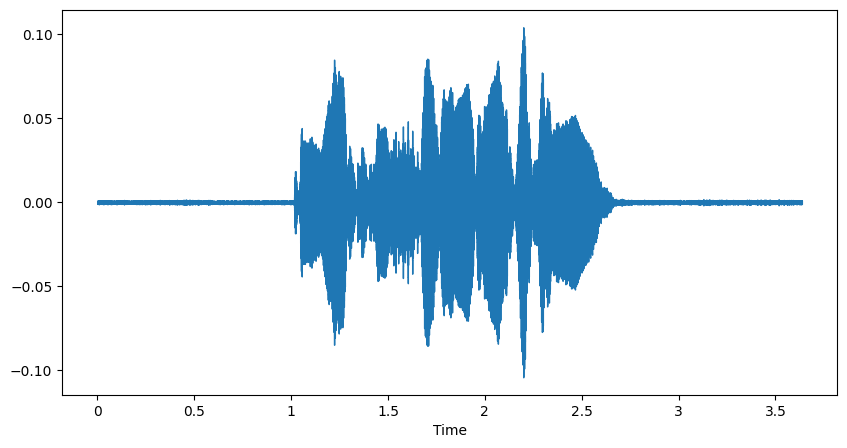

In [15]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(10,5))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

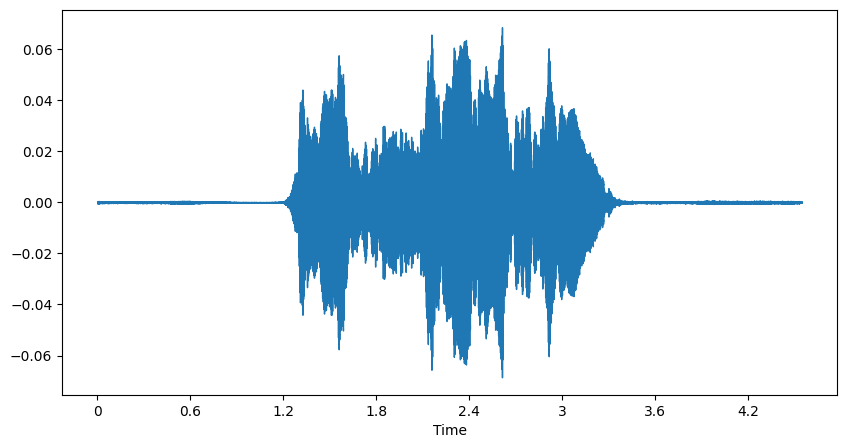

In [16]:
# STRETCH AUDIO
x = stretch(data)
plt.figure(figsize=(10,5))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

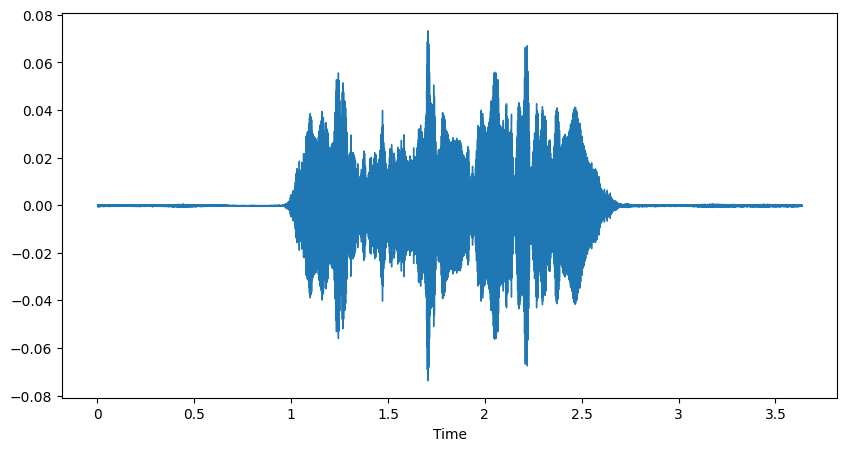

In [17]:
# PITCHED AUDIO
x = pitch(data,sr)
plt.figure(figsize=(10,5))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

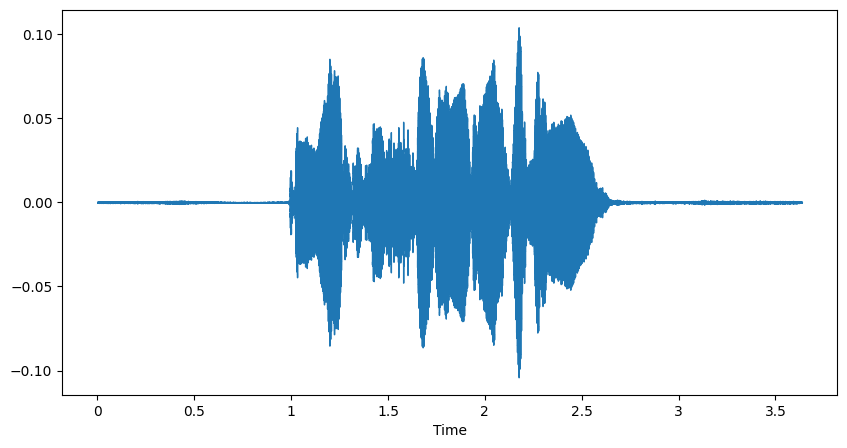

In [18]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(10,5))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

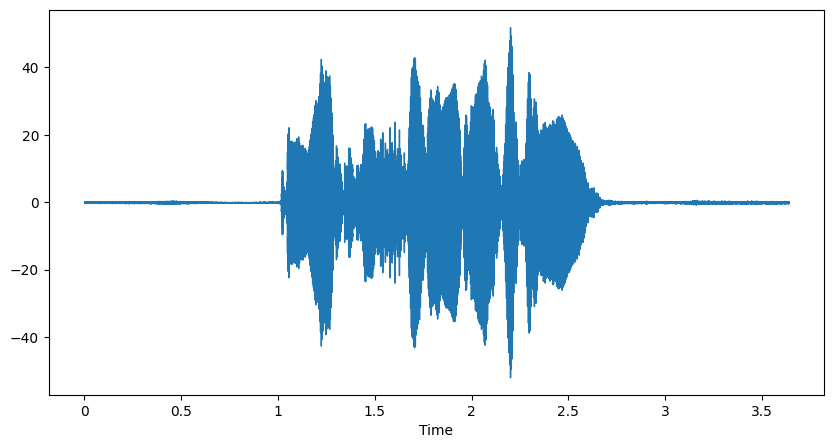

In [19]:
# Volume AUDIO
x = volume(data)
plt.figure(figsize=(10,5))
librosa.display.waveshow(y=x, sr=sr)
Audio(x,rate=sr)

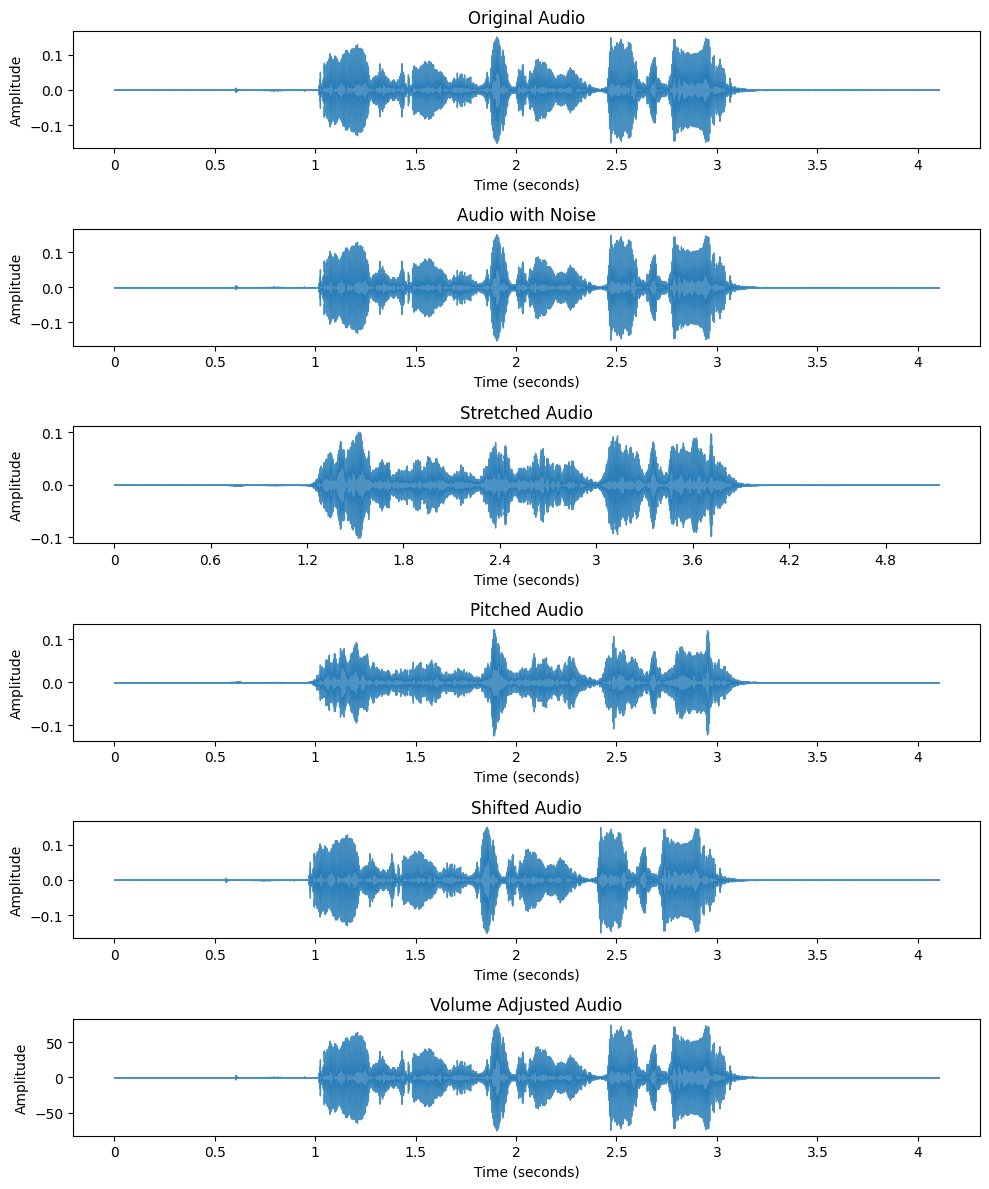

In [20]:
original_audio = dataset_path +'Actor_10/03-01-05-01-02-01-10.wav'  # Replace with the correct path
data, sr = librosa.load(original_audio)

# Prepare transformations
noisy_audio = noise(data)
stretched_audio = stretch(data)
pitched_audio = pitch(data, sr)
shifted_audio = shift(data)
volume_audio = volume(data)

# Plot all waveforms
plt.figure(figsize=(10, 12))

# Original audio
plt.subplot(6, 1, 1)
librosa.display.waveshow(data, sr=sr, alpha=0.8)
plt.title('Original Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Audio with noise
plt.subplot(6, 1, 2)
librosa.display.waveshow(noisy_audio, sr=sr, alpha=0.8)
plt.title('Audio with Noise')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Stretched audio
plt.subplot(6, 1, 3)
librosa.display.waveshow(stretched_audio, sr=sr, alpha=0.8)
plt.title('Stretched Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Pitched audio
plt.subplot(6, 1, 4)
librosa.display.waveshow(pitched_audio, sr=sr, alpha=0.8)
plt.title('Pitched Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Shifted audio
plt.subplot(6, 1, 5)
librosa.display.waveshow(shifted_audio, sr=sr, alpha=0.8)
plt.title('Shifted Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Volume adjusted audio
plt.subplot(6, 1, 6)
librosa.display.waveshow(volume_audio, sr=sr, alpha=0.8)
plt.title('Volume Adjusted Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


Feature extraction

In [21]:
def feat_ext(data, sample_rate):
    # MFCC features
    mfcc = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)

    # Chroma features
    chroma = librosa.feature.chroma_stft(y=data, sr=sample_rate)
    chroma_mean = np.mean(chroma, axis=1)

    # Spectral contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=data, sr=sample_rate)
    spectral_mean = np.mean(spectral_contrast, axis=1)

    # Combine features
    return np.hstack((mfcc_mean, mfcc_std, chroma_mean, spectral_mean))

In [22]:
def get_feat(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # Original features
    res1 = feat_ext(data, sample_rate)
    result = np.array(res1)

    # Noise augmentation
    noise_data = noise(data)
    res2 = feat_ext(noise_data, sample_rate)
    result = np.vstack((result, res2))

    # Stretch + pitch augmentation
    stretched_data = stretch(data)
    pitch_data = pitch(stretched_data, sample_rate)
    res3 = feat_ext(pitch_data, sample_rate)
    result = np.vstack((result, res3))

    # Shift augmentation
    shifted_data = shift(data)
    res4 = feat_ext(shifted_data, sample_rate)
    result = np.vstack((result, res4))

    # Volume augmentation
    volume_data = volume(data)
    res5 = feat_ext(volume_data, sample_rate)
    result = np.vstack((result, res5))

    return result

In [23]:
def extract_features(df):
    X, Y = [], []
    for path, emotion in zip(df['path'], df['emotion']):
        features = get_feat(path)
        if features is not None:
            for feature in features:
                X.append(feature)
                Y.append(emotion)
    return np.array(X), np.array(Y)

In [24]:
df.head(10)

,emotion,actor,path
0,angry,1,/content/drive/MyDrive/PDS/Final_project/speec...
1,happy,1,/content/drive/MyDrive/PDS/Final_project/speec...
2,fear,1,/content/drive/MyDrive/PDS/Final_project/speec...
3,fear,1,/content/drive/MyDrive/PDS/Final_project/speec...
4,angry,1,/content/drive/MyDrive/PDS/Final_project/speec...
5,happy,1,/content/drive/MyDrive/PDS/Final_project/speec...
6,sad,1,/content/drive/MyDrive/PDS/Final_project/speec...
7,calm,1,/content/drive/MyDrive/PDS/Final_project/speec...
8,sad,1,/content/drive/MyDrive/PDS/Final_project/speec...
9,neutral,1,/content/drive/MyDrive/PDS/Final_project/speec...


In [26]:
X, Y = extract_features(df)


In [27]:
Emotion_data = pd.DataFrame(X)
Emotion_data['labels'] = Y
Emotion_data.to_csv('emotion_features.csv', index=False)
Emotion_data.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,labels
0,-294.087372,69.378784,-56.730488,33.894291,-33.003178,7.891148,-28.917904,1.085457,-26.600183,-12.674095,...,0.392596,0.305455,19.506784,18.905532,21.089841,19.099659,19.348310,18.400499,67.828943,angry
1,-272.961446,54.279146,-40.501029,21.775904,-22.111957,0.125721,-20.566485,-2.396532,-22.137497,-13.049088,...,0.449432,0.374851,17.261783,18.810037,21.184460,18.856939,18.951118,17.779494,19.462462,angry
2,-346.026520,51.919292,-53.928986,26.779543,-36.842937,5.254131,-33.959583,1.465415,-37.142174,3.910616,...,0.316062,0.357285,18.833446,19.580380,22.619508,20.690189,21.519475,20.542203,69.825752,angry
3,-290.632355,73.357147,-55.914261,34.782635,-33.626266,8.002584,-29.170155,1.749571,-26.654257,-12.746197,...,0.421551,0.345113,18.506729,18.406131,21.034137,19.042106,19.458987,18.354341,65.164039,angry
4,316.619781,69.378784,-56.730488,33.894291,-33.003178,7.891148,-28.917904,1.085458,-26.600183,-12.674095,...,0.392596,0.305455,19.506841,18.905533,21.089841,19.099659,19.348310,18.400499,67.780544,angry


In [28]:
Emotion_data = pd.read_csv('./emotion_features.csv')
Emotion_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,labels
0,-294.087372,69.378784,-56.730488,33.894291,-33.003178,7.891148,-28.917904,1.085457,-26.600183,-12.674095,...,0.392596,0.305455,19.506784,18.905532,21.089841,19.099659,19.348310,18.400499,67.828943,angry
1,-272.961446,54.279146,-40.501029,21.775904,-22.111957,0.125721,-20.566485,-2.396532,-22.137497,-13.049088,...,0.449432,0.374851,17.261783,18.810037,21.184460,18.856939,18.951118,17.779494,19.462462,angry
2,-346.026520,51.919292,-53.928986,26.779543,-36.842937,5.254131,-33.959583,1.465415,-37.142174,3.910616,...,0.316062,0.357285,18.833446,19.580380,22.619508,20.690189,21.519475,20.542203,69.825752,angry
3,-290.632355,73.357147,-55.914261,34.782635,-33.626266,8.002584,-29.170155,1.749571,-26.654257,-12.746197,...,0.421551,0.345113,18.506729,18.406131,21.034137,19.042106,19.458987,18.354341,65.164039,angry
4,316.619781,69.378784,-56.730488,33.894291,-33.003178,7.891148,-28.917904,1.085458,-26.600183,-12.674095,...,0.392596,0.305455,19.506841,18.905533,21.089841,19.099659,19.348310,18.400499,67.780544,angry
5,-497.138885,93.195457,-30.434090,21.069767,-7.970928,5.179266,-22.530813,-5.587016,-23.196280,-11.589381,...,0.373913,0.326833,24.279278,15.735545,17.991976,17.969994,18.491410,19.563710,60.189655,happy
6,-461.378970,75.174654,-20.562358,14.284557,-3.070222,0.298017,-18.184185,-8.167812,-20.633754,-11.783463,...,0.396555,0.385583,23.095639,15.634778,17.678648,17.102330,17.537713,18.232426,15.989902,happy
7,-548.886169,81.040062,-29.956577,17.194460,-11.192500,-3.048473,-27.969221,-9.069568,-29.324089,4.134042,...,0.429917,0.319476,23.530548,16.778628,20.320539,19.498965,20.472312,22.101543,62.708888,happy
8,-495.481079,92.276054,-29.716625,20.668722,-7.730641,4.857779,-22.284691,-5.789244,-23.050058,-11.543864,...,0.381983,0.350400,24.258057,15.893269,17.838925,17.875484,18.311620,19.658654,59.675456,happy
9,113.568321,93.195457,-30.434086,21.069767,-7.970926,5.179267,-22.530813,-5.587016,-23.196280,-11.589381,...,0.373913,0.326833,24.279273,15.735544,17.991976,17.969994,18.491409,19.563711,60.167289,happy


Splitting data into training and testing

In [29]:
# multiclass classification problem
encoder = OneHotEncoder()
Y = encoder.fit_transform(Y.reshape(-1, 1)).toarray()


In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5760, 45), (5760, 8), (1440, 45), (1440, 8))

In [31]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Models

Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=40)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=40)

In [33]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f"Random Forest Model Accuracy: {accuracy * 100:.2f}%")


Random Forest Model Accuracy: 61.94%


KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
clf1=KNeighborsClassifier(n_neighbors=4)
clf1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [35]:
y_pred=clf1.predict(x_test)

In [ ]:
print("Training set score: {:.3f}".format(clf1.score(x_train, y_train)))
print("Test set score: {:.3f}".format(clf1.score(x_test, y_test)))

Training set score: 0.773
Test set score: 0.594


CNN

In [37]:

from tensorflow.keras.optimizers import Adam

In [38]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)

In [39]:

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))

model.add(Dropout(0.1))
model.add(Flatten())

model.add(Dense(Y.shape[1], activation='softmax'))

#compile
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 43, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 41, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 39, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 39, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9984)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │        79,880 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,400 (794.53 KB)

 Trainable params: 203,400 (794.53 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Train the model
cnn_results = model.fit(
    x_traincnn, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_testcnn, y_test),
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(x_testcnn, y_test)
print(f"CNN Classifier Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.3782 - loss: 1.6377 - val_accuracy: 0.5986 - val_loss: 1.0957
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.6489 - loss: 0.9720 - val_accuracy: 0.6667 - val_loss: 0.9135
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.7491 - loss: 0.7049 - val_accuracy: 0.7465 - val_loss: 0.7376
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.8266 - loss: 0.5230 - val_accuracy: 0.8076 - val_loss: 0.5873
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.8856 - loss: 0.3527 - val_accuracy: 0.8188 - val_loss: 0.5623
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9167 - loss: 0.2655 - val_accuracy: 0.8271 - val_loss: 0.5832
Epoch 7/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9300 - loss: 0.2142 - val_accuracy: 0.8569 - val_loss: 0.4972
Epoch 8/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9468 - loss: 0.1577 - val_a

In [ ]:
#CNN
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8530 - loss: 0.9638
Accuracy of our model on test data :  85.06944179534912 %


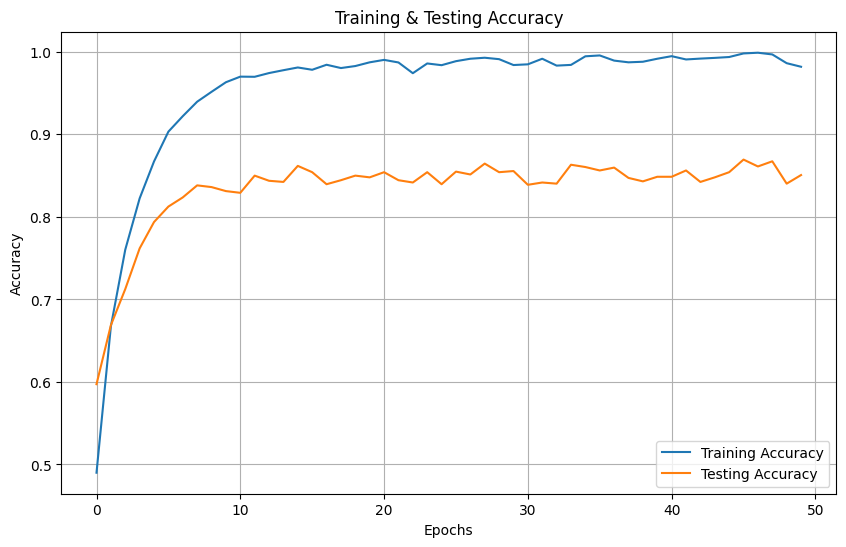

In [ ]:
import matplotlib.pyplot as plt

# CNN Results
epochs = [i for i in range(len(cnn_results.history['accuracy']))]
train_acc = cnn_results.history['accuracy']
test_acc = cnn_results.history['val_accuracy']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, test_acc, label='Testing Accuracy')
plt.title('Training & Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#CNN
pred_test = model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)

df_final = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df_final['Predicted Labels'] = y_pred.flatten()

df_final['Actual Labels'] = encoder.inverse_transform(y_test).flatten()

df_final.head(25)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


,Predicted Labels,Actual Labels
0,surprise,surprise
1,calm,calm
2,happy,happy
3,angry,angry
4,angry,angry
5,sad,sad
6,disgust,disgust
7,disgust,disgust
8,angry,angry
9,fear,fear


Text(95.72222222222221, 0.5, 'Actual Labels')

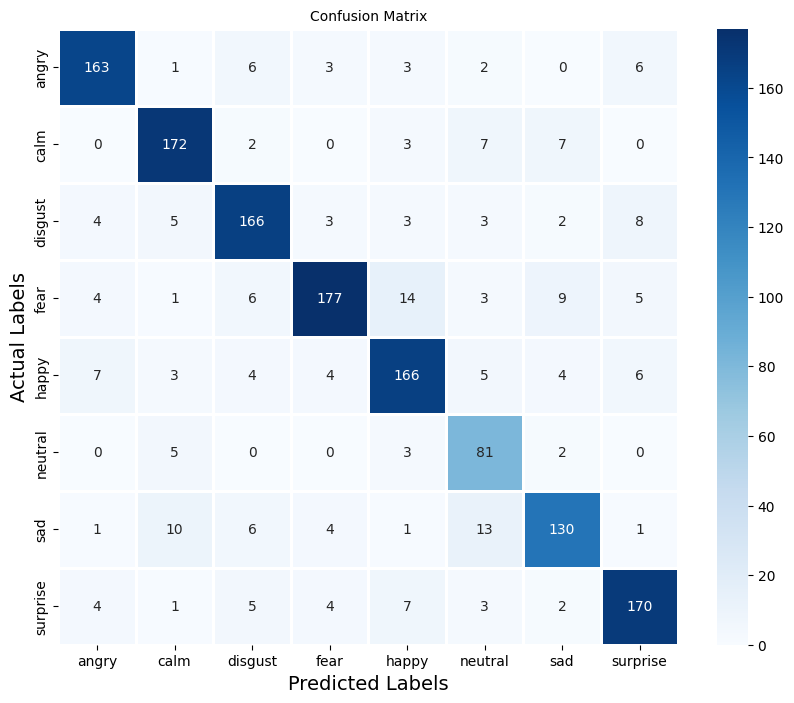

In [ ]:
#CNN
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

y_test_multiclass = np.argmax(y_test, axis=1)

y_pred_numeric = [encoder.categories_[0].tolist().index(pred) for pred in y_pred]

cm = confusion_matrix(y_test_multiclass, y_pred_numeric)
plt.figure(figsize = (10, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=10)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)

Rows: Represent the actual (true) class labels.

Columns: Represent the predicted class labels.

Diagonal Elements: Indicate correct predictions. For example, the value 163 in the top-left cell means that 182 instances of the "angry" class were correctly predicted as "angry."

In [ ]:
#CNN
from sklearn.metrics import classification_report
import numpy as np

y_test_multiclass = np.argmax(y_test, axis=1)

y_pred_multiclass = [encoder.categories_[0].tolist().index(pred[0]) for pred in y_pred]


print("Classification Report:\n", classification_report(y_test_multiclass, y_pred_multiclass))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       184
           1       0.87      0.90      0.88       191
           2       0.85      0.86      0.85       194
           3       0.91      0.81      0.86       219
           4       0.83      0.83      0.83       199
           5       0.69      0.89      0.78        91
           6       0.83      0.78      0.81       166
           7       0.87      0.87      0.87       196

    accuracy                           0.85      1440
   macro avg       0.84      0.85      0.85      1440
weighted avg       0.85      0.85      0.85      1440

